In [5]:
import pandas as pd
import plotly.express as px
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3
import streamlit as st
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [6]:
demog = pd.read_csv('m5_survey_data_demographics.csv')
tech = pd.read_csv('m5_survey_data_technologies_normalised.csv')

tech_demog = pd.merge(tech,demog,on='Respondent',how='inner')

df = tech_demog[['Respondent','Age','EdLevel','ConvertedComp']]

df.head()


,Respondent,Age,EdLevel,ConvertedComp
0,4.0,22.0,"Bachelor’s degree (BA, BS, B.Eng., etc.)",61000.0
1,4.0,22.0,"Bachelor’s degree (BA, BS, B.Eng., etc.)",61000.0
2,4.0,22.0,"Bachelor’s degree (BA, BS, B.Eng., etc.)",61000.0
3,4.0,22.0,"Bachelor’s degree (BA, BS, B.Eng., etc.)",61000.0
4,4.0,22.0,"Bachelor’s degree (BA, BS, B.Eng., etc.)",61000.0


In [7]:
tech_demog.shape

(74589, 83)

In [8]:
tech_demog.columns

Index(['Respondent', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'MainBranch', 'Hobbyist',
       'OpenSourcer', 'OpenSource', 'Employment', 'Country', 'Student',
       'EdLevel', 'UndergradMajor', 'EduOther', 'OrgSize', 'DevType',
       'YearsCode', 'Age1stCode', 'YearsCodePro', 'CareerSat', 'JobSat',
       'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt',
       'FizzBuzz', 'JobFactors', 'ResumeUpdate', 'CurrencySymbol',
       'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs',
       'WorkPlan', 'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn',
       'CodeRev', 'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion',
 

In [16]:
tech_demog['Gender'].value_counts()

Man                                                            68957
Woman                                                           4326
Non-binary, genderqueer, or gender non-conforming                461
Man;Non-binary, genderqueer, or gender non-conforming            191
Woman;Non-binary, genderqueer, or gender non-conforming           76
Woman;Man                                                         55
Woman;Man;Non-binary, genderqueer, or gender non-conforming       10
Name: Gender, dtype: int64

In [ ]:
m_f_tech_demog = tech_demog.query("Gender == 'Man' or Gender == 'Woman'")
m_f_tech_demog['Gender'].value_counts()
# Count number of men and women
counts = m_f_tech_demog['Gender'].value_counts()

# Calculate percentage of men and women
percentages = counts / counts.sum()

# Create pie chart
fig = px.pie(
    values=percentages,
    names=percentages.index,
    title='Gender Distribution'
)
fig.show()

In [26]:
tech_demog_loc = tech_demog.groupby(['Country'])['Respondent'].count().reset_index().sort_values('Respondent',ascending=False)


,Country,Respondent
128,United States,20818
50,India,5977
126,United Kingdom,5164
42,Germany,4521
20,Canada,2775
...,...,...
65,Libyan Arab Jamahiriya,5
21,Cape Verde,4
105,Somalia,4
53,Iraq,3


In [34]:
df_count = tech_demog.groupby(['Gender', 'EdLevel'])['Respondent'].count().reset_index()
df_count

,Gender,EdLevel,Respondent
0,Man,Associate degree,2376
1,Man,"Bachelor’s degree (BA, BS, B.Eng., etc.)",35135
2,Man,I never completed any formal education,204
3,Man,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",15939
4,Man,"Other doctoral degree (Ph.D, Ed.D., etc.)",1564
5,Man,Primary/elementary school,169
6,Man,"Professional degree (JD, MD, etc.)",966
7,Man,"Secondary school (e.g. American high school, G...",3255
8,Man,Some college/university study without earning ...,8680
9,"Man;Non-binary, genderqueer, or gender non-con...",Associate degree,6


In [41]:
m_f_tech_demog = tech_demog.query("Gender == 'Man' or Gender == 'Woman'")
m_f_tech_demog.shape

(73283, 83)

In [39]:
tech_demog_age = m_f_tech_demog.groupby('Age')['Respondent'].count().reset_index().sort_values('Respondent',ascending=False)

In [54]:
rel_bash = tech_demog[tech_demog['LanguageWorkedWith'] == 'Bash/Shell/PowerShell']
rel_bash = rel_bash.groupby('PlatformWorkedWith').count().sort_values('Respondent',ascending=False).reset_index()
rel_bash[['PlatformWorkedWith','Respondent']]

,PlatformWorkedWith,Respondent
0,AWS,1272
1,Android,913
2,Docker,848
3,Linux,537
4,Arduino,290
5,Windows,211
6,Microsoft Azure,137
7,Google Cloud Platform,81
8,Heroku,55
9,iOS,52


### Deal With Missing Values

In [9]:
df.isna().sum()

Respondent          0
Age              1881
EdLevel           763
ConvertedComp    5630
dtype: int64

In [10]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['EdLevel'].fillna(df['EdLevel'].mode()[0], inplace=True)
df.dropna(subset='ConvertedComp',inplace=True)

C:\Users\MI\AppData\Local\Temp\ipykernel_7404\1867712614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\MI\AppData\Local\Temp\ipykernel_7404\1867712614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EdLevel'].fillna(df['EdLevel'].mode()[0], inplace=True)
C:\Users\MI\AppData\Local\Temp\ipykernel_7404\1867712614.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d

In [11]:
df.isna().sum()

Respondent       0
Age              0
EdLevel          0
ConvertedComp    0
dtype: int64

In [12]:
df['log_age'] = np.log(df['Age']) 
df['log_ConvertedComp'] = np.log(df['ConvertedComp']) 

C:\Users\MI\AppData\Local\Temp\ipykernel_7404\2649615375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_age'] = np.log(df['Age'])
c:\Users\MI\Desktop\Data Analysis\Python for Data Analysis\env\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\MI\AppData\Local\Temp\ipykernel_7404\2649615375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_ConvertedComp'] = np.log(df['Converted

In [13]:
from scipy.stats import shapiro

# Check normality of Age column
stat, p = shapiro(df['Age'])
print('Age column normality test:')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Age column looks normally distributed (fail to reject H0)')
else:
    print('Age column does not look normally distributed (reject H0)')

# Check normality of ConvertedComp column
stat, p = shapiro(df['ConvertedComp'])
print('ConvertedComp column normality test:')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('ConvertedComp column looks normally distributed (fail to reject H0)')
else:
    print('ConvertedComp column does not look normally distributed (reject H0)')


c:\Users\MI\Desktop\Data Analysis\Python for Data Analysis\env\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Age column normality test:
Statistics=0.921, p=0.000
Age column does not look normally distributed (reject H0)
ConvertedComp column normality test:
Statistics=0.385, p=0.000
ConvertedComp column does not look normally distributed (reject H0)


### Deal With Outliers

In [15]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 = Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
df_clean = df[~((df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound))]
df_clean.shape

(38690, 6)

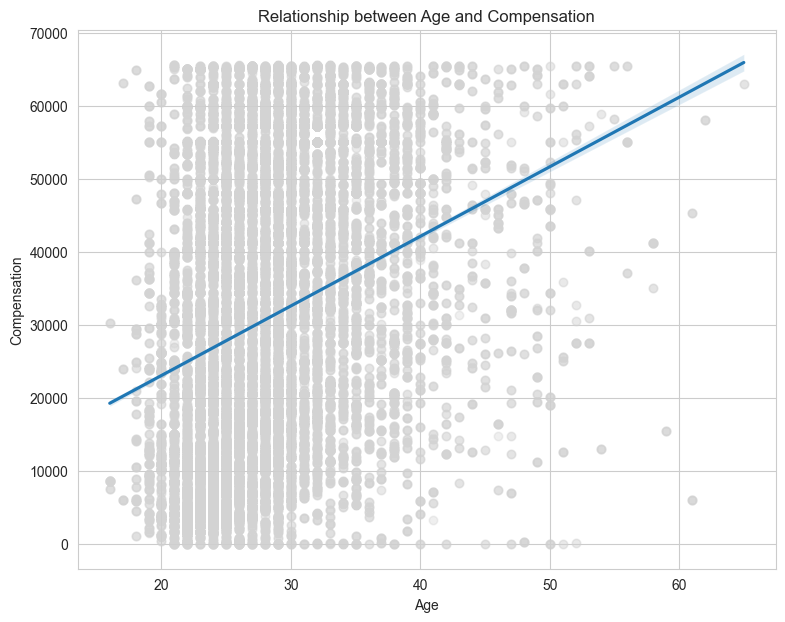

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(9, 7))
sns.regplot(x=df_clean['Age'],y=df_clean['ConvertedComp'],scatter_kws={'color': 'lightgray', 'alpha': 0.2})
# add labels and a title to the plot
plt.xlabel('Age')
plt.ylabel('Compensation')
plt.title('Relationship between Age and Compensation')
plt.show()

In [12]:
import scipy.stats as stats

# calculate the Pearson correlation coefficient and p-value
corr, p_val = stats.pearsonr(df_clean['Age'], df_clean['ConvertedComp'])

# print the results
print(f"Pearson correlation coefficient: {corr:.3f}")
print(f"P-value: {p_val:.3f}")

# check if the correlation coefficient is statistically significant
if p_val < 0.05:
    print("The correlation between age and compensation is statistically significant.")
else:
    print("The correlation between age and compensation is not statistically significant.")


Pearson correlation coefficient: 0.303
P-value: 0.000
The correlation between age and compensation is statistically significant.


In [13]:
import scipy.stats as stats

# group the data by education level
groups = [group[1]['ConvertedComp'] for group in df_clean.groupby('EdLevel')]

# perform an ANOVA test
f_stat, p_val = stats.f_oneway(*groups)

# print the results
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_val:.3f}")

# check if the p-value is statistically significant
if p_val < 0.05:
    print("There is a statistically significant difference in compensation between the education groups.")
else:
    print("There is not a statistically significant difference in compensation between the education groups.")


F-statistic: 111.014
P-value: 0.000
There is a statistically significant difference in compensation between the education groups.


In [14]:
for group in df_clean.groupby('EdLevel'):
    print(group[1])

       Respondent   Age           EdLevel  ConvertedComp   log_age  \
78           25.0  22.0  Associate degree         6300.0  3.091042   
79           25.0  22.0  Associate degree         6300.0  3.091042   
80           25.0  22.0  Associate degree         6300.0  3.091042   
81           25.0  22.0  Associate degree         6300.0  3.091042   
82           25.0  22.0  Associate degree         6300.0  3.091042   
...           ...   ...               ...            ...       ...   
74431     25093.0  25.0  Associate degree        54996.0  3.218876   
74432     25093.0  25.0  Associate degree        54996.0  3.218876   
74433     25093.0  25.0  Associate degree        54996.0  3.218876   
74434     25093.0  25.0  Associate degree        54996.0  3.218876   
74435     25093.0  25.0  Associate degree        54996.0  3.218876   

       log_ConvertedComp  
78              8.748305  
79              8.748305  
80              8.748305  
81              8.748305  
82              8.748305

**To Know Which Group Most Significant, uSe PostHoc Tukey Honestly Significant Difference (HSD)**


In [15]:
import statsmodels.stats.multicomp as mc

# perform Tukey HSD test
tukey = mc.MultiComparison(df_clean['ConvertedComp'], df_clean['EdLevel'])
results = tukey.tukeyhsd()

# print the results
print(results)


                                                                                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                                                                                  
                                      group1                                                                             group2                                         meandiff  p-adj     lower       upper    reject
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                  Associate degree                                           Bachelor’s degree (BA, BS, B.Eng., etc.)  -5273.5568    0.0   -6884.431  -3662.6827   True
                                                                  Associate degree                                             I never c

In [16]:
df_clean['Age'].describe()

count    38690.00000
mean        28.56640
std          6.06189
min         16.00000
25%         24.00000
50%         28.00000
75%         31.00000
max         65.00000
Name: Age, dtype: float64

In [17]:
import pandas as pd
import streamlit as st
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

dt = df_clean[['EdLevel','ConvertedComp','Age']]

# create dummy variables for education level
ohe = OneHotEncoder(sparse=False)
ct = make_column_transformer((ohe, ['EdLevel']), remainder='passthrough')
X = ct.fit_transform(dt.drop('ConvertedComp', axis=1))

# define the target variable and fit a linear regression model
y = dt['ConvertedComp']
model = LinearRegression().fit(X, y)

# define the education level options for the dropdown list
ed_level_options = dt['EdLevel'].unique()

# create a sidebar for user inputs
st.sidebar.title('Enter your information')
ed_level = st.sidebar.selectbox('Education level:', ed_level_options)
age = st.sidebar.slider('Age:', 16, 65, 30)

# transform the user inputs and predict the compensation
new_data = pd.DataFrame({'EdLevel': [ed_level], 'Age': [age]})
new_X = ct.transform(new_data)
predicted_compensation = model.predict(new_X)

# display the predicted compensation to the user
st.title('Your predicted compensation')
st.write('Education level:', ed_level)
st.write('Age:', age)
st.write('Predicted compensation:', predicted_compensation[0])


c:\Users\MI\Desktop\Data Analysis\Python for Data Analysis\env\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
2023-04-20 16:21:57.788 
  command:

    streamlit run c:\Users\MI\Desktop\Data Analysis\Python for Data Analysis\env\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [67]:
from scipy.stats import shapiro

# Check normality of Age column
stat, p = shapiro(df_no_outliers['log_age'])
print('Age column normality test:')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Age column looks normally distributed (fail to reject H0)')
else:
    print('Age column does not look normally distributed (reject H0)')

# Check normality of ConvertedComp column
stat, p = shapiro(df_no_outliers['log_ConvertedComp'])
print('ConvertedComp column normality test:')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('ConvertedComp column looks normally distributed (fail to reject H0)')
else:
    print('ConvertedComp column does not look normally distributed (reject H0)')


Age column normality test:
Statistics=0.976, p=0.000
Age column does not look normally distributed (reject H0)
ConvertedComp column normality test:
Statistics=nan, p=1.000
ConvertedComp column looks normally distributed (fail to reject H0)


c:\Users\MI\Desktop\Data Analysis\Python for Data Analysis\env\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


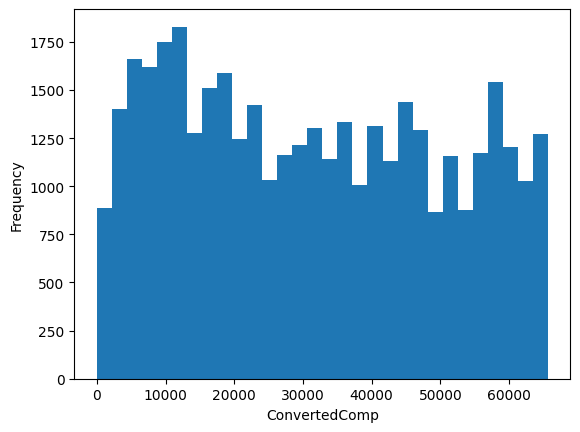

In [76]:
import matplotlib.pyplot as plt

plt.hist(df_no_outliers['ConvertedComp'], bins=30)
plt.xlabel('ConvertedComp')
plt.ylabel('Frequency')
plt.show()

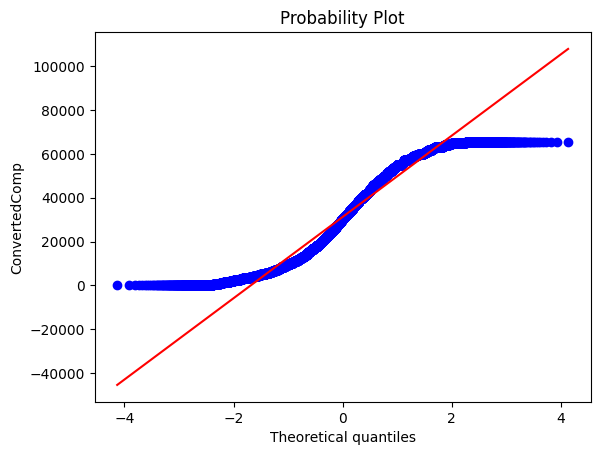

In [75]:
from scipy.stats import probplot

probplot(df_no_outliers['ConvertedComp'], plot=plt)
plt.xlabel('Theoretical quantiles')
plt.ylabel('ConvertedComp')
plt.show()

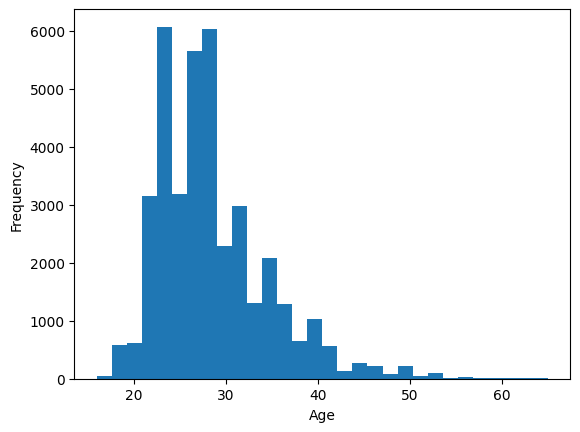

In [74]:
import matplotlib.pyplot as plt

plt.hist(df_no_outliers['Age'], bins=30)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

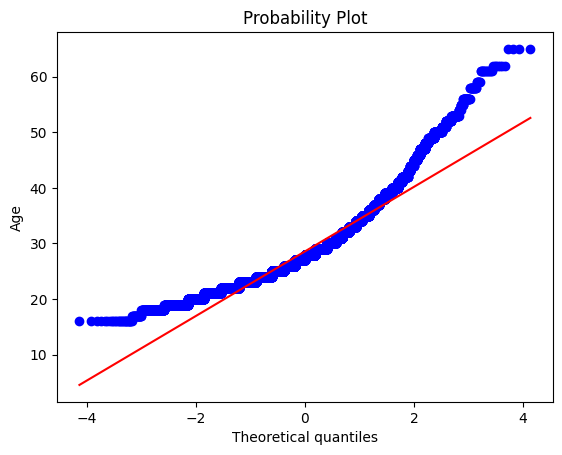

In [77]:
from scipy.stats import probplot

probplot(df_no_outliers['Age'], plot=plt)
plt.xlabel('Theoretical quantiles')
plt.ylabel('Age')
plt.show()